<a href="https://colab.research.google.com/github/oktaagnes/bikeSharing/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- **Nama:** Okta Agnes Ladyagatha Manik
- **Email:** oktaagnesmanik@gmail.com
- **ID Dicoding:** B244048F

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Berapa jumlah penyewa setiap bulan?
- Pertanyaan 2  Berapa persen perbedaan jumlah penyewaan sepeda antara working dan  weekend?
- Pertanyaan 3 Berapa banyak penyewa yang memilih antara casual  dan registered saat menyewa sepeda ? dan ada hubungannya dengan musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
#membaca data dari URL
day_df = pd.read_csv("https://raw.githubusercontent.com/oktaagnes/bikeSharing/refs/heads/main/Data/day.csv")
# menampilkan dataFrame
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
#membaca data dari URL
hour_df = pd.read_csv("https://raw.githubusercontent.com/oktaagnes/bikeSharing/refs/heads/main/Data/hour.csv")
#Menampilkan dataFrame
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Pada dataset bernama day  memiliki jumlah baris sebanyak 731 baris dan 16 kolom
- Pada dataset bernama hour memiliki jumlah baris sebanyak 17379 baris dan 17 kolom

### Assessing Data

In [4]:
#tampilkan informasi tentng dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Menampilkan Missing values pada DataFrame 'day_df'
print("Missing values:\n", day_df.isna().sum())

Missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# menghitung duplikasi pada DataFrame 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Menghitung Jumlah Nilai Unik pada DataFrame `day_df`
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [8]:
# memilih kolom numerik pada day_df
num_columns_day = day_df.select_dtypes(include=[np.number]).columns
num_columns_day

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

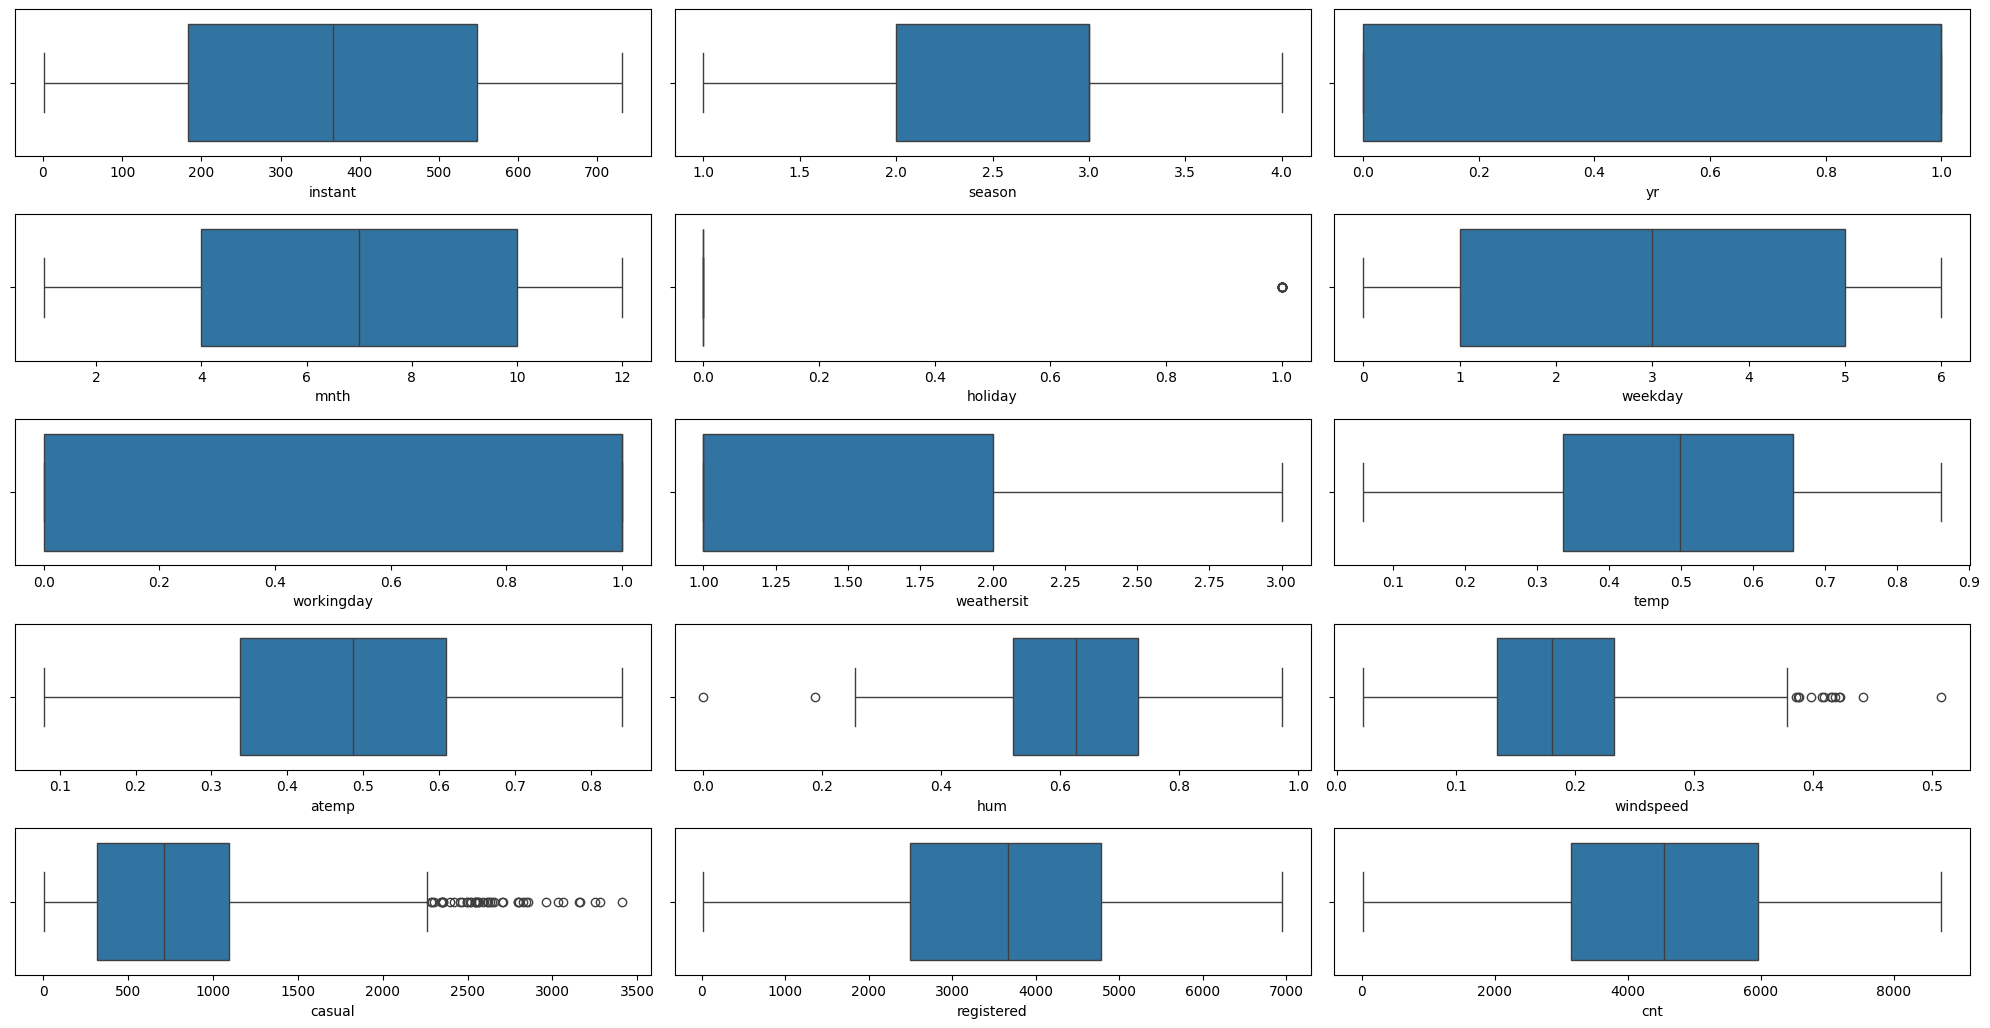

In [9]:
# Plotting untuk hour_df
plt.figure(figsize=(20, 12))

# Mengatur jumlah baris dan kolom untuk subplots
num_rows = 6
num_cols = 3

for i, column in enumerate(num_columns_day, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=day_df, x=day_df[column])
    plt.tight_layout()

In [10]:
#memberikan informas mengenai dataFrame 'hour_day'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
#Menampilkan Missing values pada DataFrame 'hour_df'
print("Missing Values:\n",hour_df.isna().sum())

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
# Menghitung Jumlah Nilai Unik pada DataFrame `hour_df`
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [15]:
# memilih kolom numerik pada hour_df
num_columns_hour = hour_df.select_dtypes(include=[np.number]).columns
num_columns_hour

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

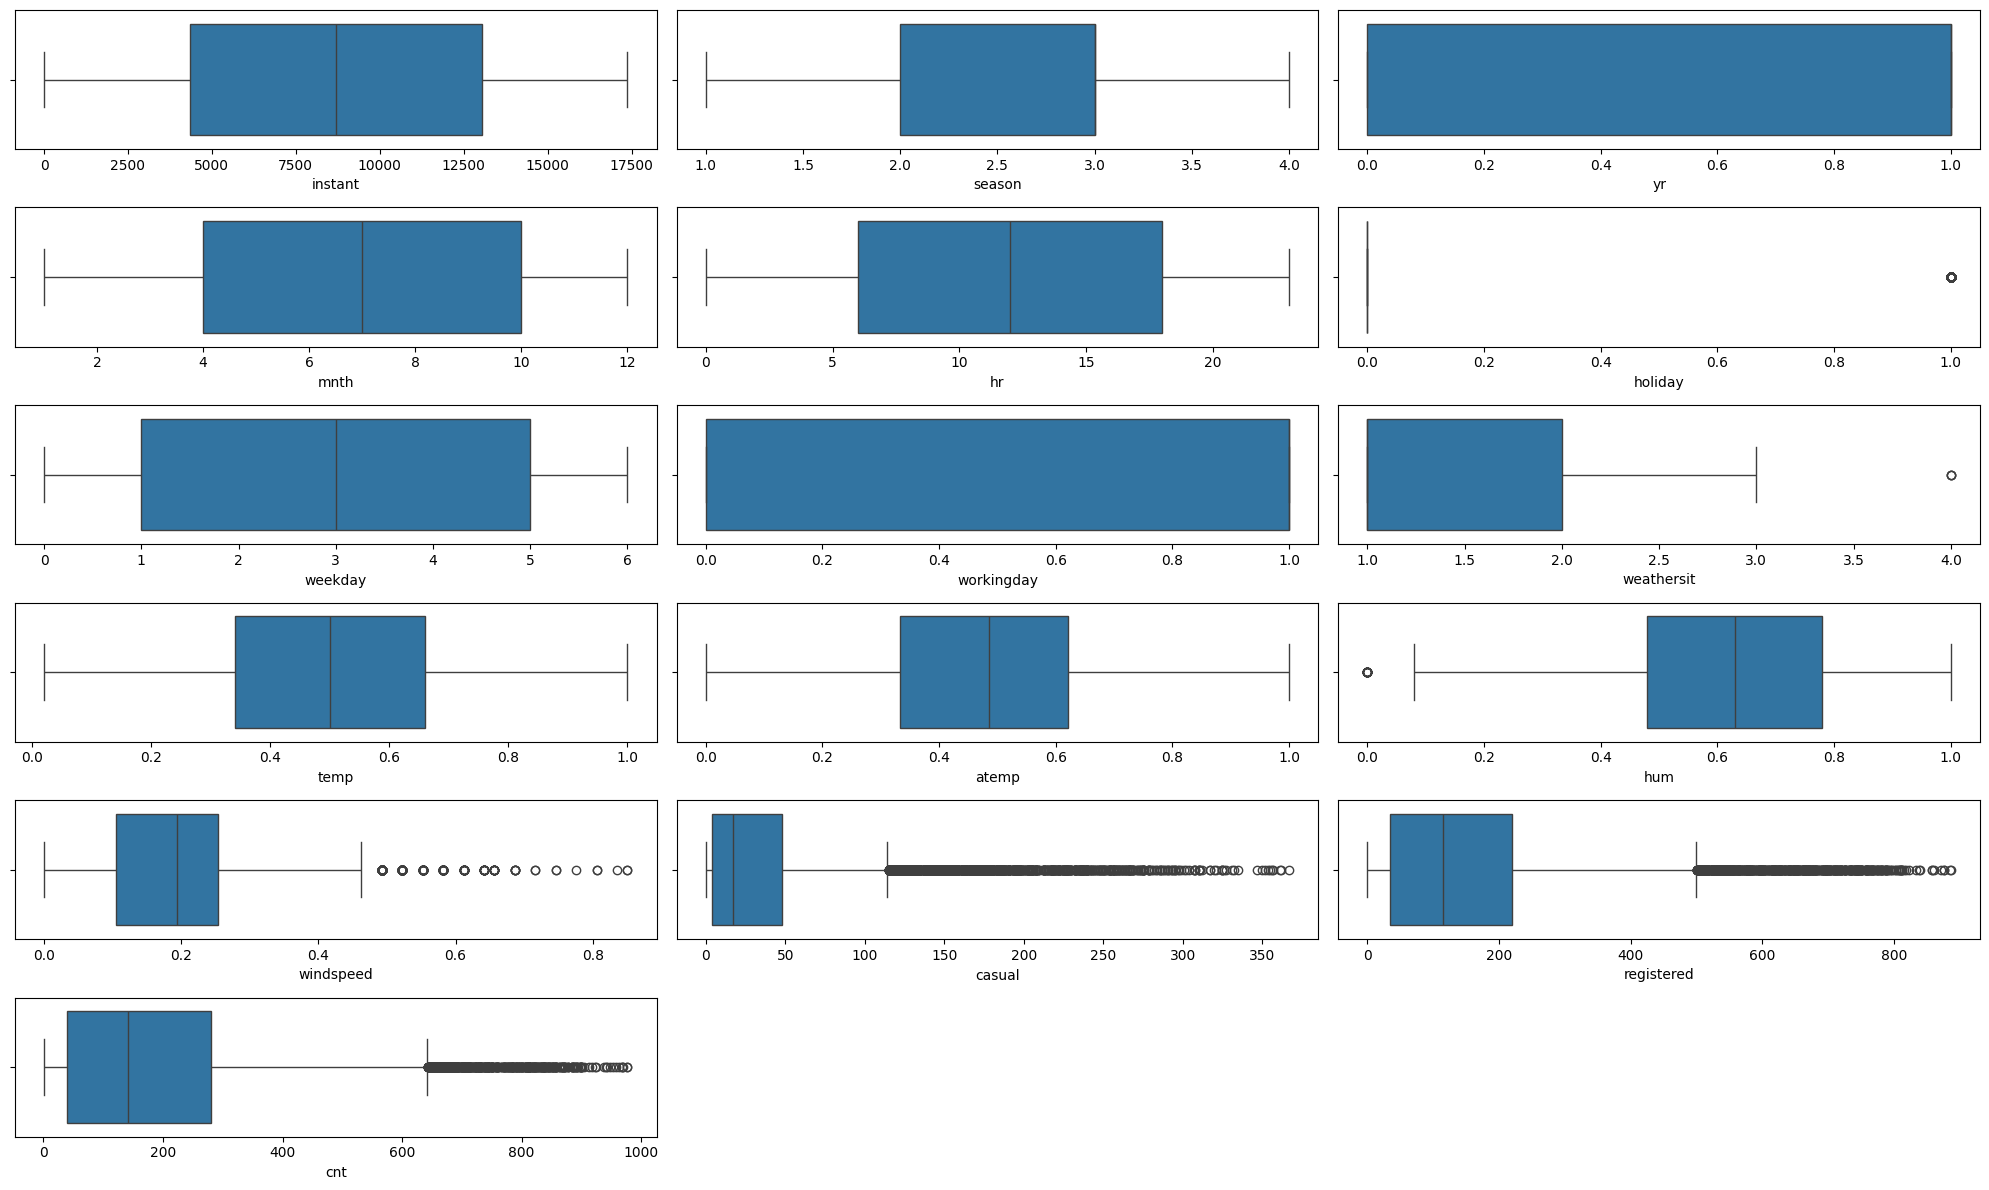

In [16]:
# Plotting untuk hour_df
plt.figure(figsize=(20, 12))

# Mengatur jumlah baris dan kolom untuk subplots
num_rows = 6
num_cols = 3

for i, column in enumerate(num_columns_hour, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=hour_df, x=hour_df[column])
    plt.tight_layout()

**Insight:**
- Tidak ada data yang duplikasi
- Tidak ada yang missing values
- tipe data dtame yaitu objek harus di ubah ke date

### Cleaning Data

In [17]:
# Hapus kolom 'instant' pada dataframe day
day_df = day_df.drop(columns=['instant'])

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [19]:
#ubah data dteday pada dataframe day menjadi date
col_need_to_clean = ['dteday']

In [20]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [21]:
# Menampilkan Informasi Umum tentang DataFrame `day_df`
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [22]:
# Hapus kolom 'instant' pada dataframe hour
hour_df = hour_df.drop(columns=['instant'])

In [23]:
# Menampilkan Informasi Umum tentang DataFrame `hour_df`
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [24]:
#ubah data dteday pada dataframe day menjadi date
col_need_to_clean = ['dteday']
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [25]:
# Menampilkan Informasi Umum tentang DataFrame `hour_df`
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

**Insight:**
- nama data dan type data telah sesuai

## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
# Menyajikan Statistik Deskriptif untuk Semua Kolom pada DataFrame `day_df`
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [27]:
#Menghitung Jumlah Nilai Unik pada DataFrame `hour_df`
day_df.nunique()

,0
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499
atemp,690


In [28]:
#explorepertnyaan 1
explore_pertanyaan1 = day_df.groupby(['mnth', 'yr'])['cnt'].sum().reset_index()
explore_pertanyaan1

,mnth,yr,cnt
0,1,0,38189
1,1,1,96744
2,2,0,48215
3,2,1,103137
4,3,0,64045
5,3,1,164875
6,4,0,94870
7,4,1,174224
8,5,0,135821
9,5,1,195865


In [29]:
def create_monthly_df(df):
    monthly_df = df.groupby(by=["mnth","yr"]).agg({
        "cnt" : "sum"
    }).reset_index()
    return monthly_df
day_df['dteday'] = pd.to_datetime(day_df["dteday"])

In [30]:
#pertanyaan 1
# Fungsi untuk menetapkan cluster
def assign_cluster(cnt):
    if cnt < 125000:
        return 'Cluster 1 (Rendah)'
    elif 125000 <= cnt <= 150000:
        return 'Cluster 2 (Sedang)'
    else:
        return 'Cluster 3 (Tinggi)'

# Terapkan fungsi ke DataFrame
explore_pertanyaan1['cluster'] = explore_pertanyaan1['cnt'].apply(assign_cluster)
print(explore_pertanyaan1)

    mnth  yr     cnt             cluster
0      1   0   38189  Cluster 1 (Rendah)
1      1   1   96744  Cluster 1 (Rendah)
2      2   0   48215  Cluster 1 (Rendah)
3      2   1  103137  Cluster 1 (Rendah)
4      3   0   64045  Cluster 1 (Rendah)
5      3   1  164875  Cluster 3 (Tinggi)
6      4   0   94870  Cluster 1 (Rendah)
7      4   1  174224  Cluster 3 (Tinggi)
8      5   0  135821  Cluster 2 (Sedang)
9      5   1  195865  Cluster 3 (Tinggi)
10     6   0  143512  Cluster 2 (Sedang)
11     6   1  202830  Cluster 3 (Tinggi)
12     7   0  141341  Cluster 2 (Sedang)
13     7   1  203607  Cluster 3 (Tinggi)
14     8   0  136691  Cluster 2 (Sedang)
15     8   1  214503  Cluster 3 (Tinggi)
16     9   0  127418  Cluster 2 (Sedang)
17     9   1  218573  Cluster 3 (Tinggi)
18    10   0  123511  Cluster 1 (Rendah)
19    10   1  198841  Cluster 3 (Tinggi)
20    11   0  102167  Cluster 1 (Rendah)
21    11   1  152664  Cluster 3 (Tinggi)
22    12   0   87323  Cluster 1 (Rendah)
23    12   1  12

In [31]:
#explore pertanyaan2
day_df['casual_percent'] = (day_df['casual'] / day_df['cnt']) * 100
day_df['registered_percent'] = (day_df['registered'] / day_df['cnt']) * 100
day_df[['casual', 'registered', 'casual_percent', 'registered_percent']]

,casual,registered,casual_percent,registered_percent
0,331,654,33.604061,66.395939
1,131,670,16.354557,83.645443
2,120,1229,8.895478,91.104522
3,108,1454,6.914213,93.085787
4,82,1518,5.125000,94.875000
...,...,...,...,...
726,247,1867,11.684011,88.315989
727,644,2451,20.807754,79.192246
728,159,1182,11.856823,88.143177
729,364,1432,20.267261,79.732739


In [32]:
#lanjutan pertanyaan 2
# Hitung persen penyewaan casual dan registered
day_df['casual_percent'] = (day_df['casual'] / day_df['cnt']) * 100
day_df['registered_percent'] = (day_df['registered'] / day_df['cnt']) * 100

# Pisahkan data berdasarkan working day dan weekend
working_day_df = day_df[day_df['workingday'] == 1]
weekend_df = day_df[day_df['workingday'] == 0]

# Hitung rata-rata penyewaan sepeda untuk working day dan weekend
working_day_avg = working_day_df['cnt'].mean()
weekend_avg = weekend_df['cnt'].mean()

# Hitung persentase perbedaan
percent_difference = abs(working_day_avg - weekend_avg) / max(working_day_avg, weekend_avg) * 100

# Hasil
print(f"Rata-rata penyewaan sepeda pada hari kerja: {working_day_avg}")
print(f"Rata-rata penyewaan sepeda pada akhir pekan: {weekend_avg}")
print(f"Persentase perbedaan penyewaan: {percent_difference:.2f}%")

Rata-rata penyewaan sepeda pada hari kerja: 4584.82
Rata-rata penyewaan sepeda pada akhir pekan: 4330.168831168831
Persentase perbedaan penyewaan: 5.55%


In [33]:
# Pertanyaan 3
# Buat total penyewa casual dan registered berdasarkan musim
grouped = day_df.groupby('season').agg(
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum')
).reset_index()

# Tambahkan total keseluruhan penyewa
grouped['total_all'] = grouped['total_casual'] + grouped['total_registered']

# Definisikan musim untuk interpretasi
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
grouped['season_name'] = grouped['season'].map(season_mapping)

grouped

,season,total_casual,total_registered,total_all,season_name
0,1,60622,410726,471348,Spring
1,2,203522,715067,918589,Summer
2,3,226091,835038,1061129,Fall
3,4,129782,711831,841613,Winter


In [34]:
# Assuming 'cnt' represents the order or rental count
day_df.groupby(by="dteday")['cnt'].count().sort_values(ascending=False).reset_index().head(10)

,dteday,cnt
0,2011-01-01,1
1,2012-04-25,1
2,2012-04-27,1
3,2012-04-28,1
4,2012-04-29,1
5,2012-04-30,1
6,2012-05-01,1
7,2012-05-02,1
8,2012-05-03,1
9,2012-05-04,1


In [35]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [36]:
#Menghitung Jumlah Nilai Unik pada DataFrame `hour_df`
hour_df.nunique()

,0
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4
temp,50


In [37]:
num_columns_hour

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Insight:**
-  Jumlah penyewa setiap tahunnya, diawal tahun cukup rendah di bawah 125.000 penyewa namun pada pertengahan bulan ada kenaikan menjadi 125000 penyewa, ada faktor cuaca yang mempengaruhi karena adanya pola yang kosisten.
- Registered dan casual mempunyai persentase perbedaan hingga 5.55% serta kondisi cuaca (suhu, kecepatan angin dan situasi cuaca) memperngaruhi kegiatan penyewaan sepeda karena ada penurunan jumlah penyewa saat di akhir tahun dan awal tahun.
- Faktor terbesar yang memengaruhi penyewaan sepeda adalah status pengguna registered dan casual. total casual adalah 620,017 dan registered adalah 2672662.
- Untuk mendorong penggunaan sepeda, penyedia layanan dapat berfokus pada pengguna registered dan memastikan aksesibilitas di kondisi cuaca tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

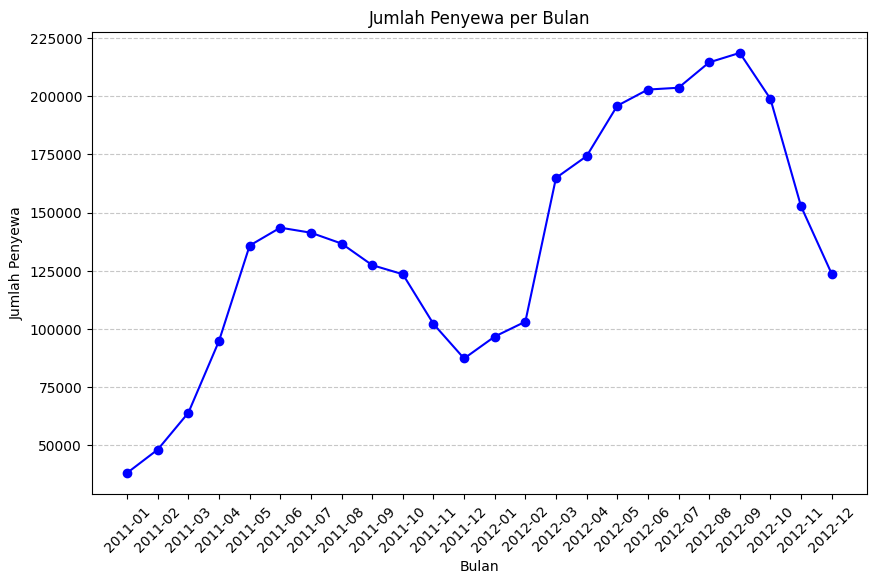

In [38]:
  # Tambahkan kolom nama bulan
  day_df['mnthh'] = day_df['dteday'].dt.to_period('M')

  # Kelompokkan data berdasarkan bulan
  grouped = day_df.groupby('mnthh')['cnt'].sum().reset_index()

  # Plot
  plt.figure(figsize=(10, 6))
  plt.plot(grouped['mnthh'].astype(str), grouped['cnt'], marker='o', color='blue')
  plt.xticks(rotation=45, fontsize=10)
  plt.title('Jumlah Penyewa per Bulan')
  plt.xlabel('Bulan')
  plt.ylabel('Jumlah Penyewa')

  # Menampilkan hanya garis horizontal
  plt.grid(axis='y', linestyle='--', alpha=0.7)  # Hanya garis horizontal dengan garis putus-putus

  # Tampilkan grafik
  plt.show()


**Insight**


- Tren kenaikan Awal:Jumlah penyewa meningkat signifikan dari bulan januari 2011 di bawah 50000 penyewa hingga mencapai puncak pertama di sekitar bulan juni 2011 kenaikan tersebut mencapai di atas 125000 penyewa.
- Penurunan di Tengah Tahun: Setelah puncak awal, terjadi penurunan jumlah penyewa hingga titik terendah sampai menyentuk angka dibawah 100.000 pada bulan Desember 2011 .
- Kenaikan Tajam kedua: Setelah penurunan akhir tahun itu, jumlah penyewa mulai mengalami kenaikan signifikan lagi di awal tahun 2012 hingga mencapai puncak kedua pertengahan bulan dari bulan juni hingga oktober dimana penyewa mencapai rata-rata di atas 200.000.
- Fluktuasi Tahunan: Jumlah penyewa perbulan mengalami fluktuasi yang signifikan setiap tahun, dengan pola puncak dan peurunan yang konsisten.
- Musim atau Pola Periodik: Kemungkinan ada faktor musiman atau pola tertentu yang mempegaruhi jumlah penyewa perbulan, terutama pada bulan tertetu yang terlihat stabil dengan jumlah lebih tinggi.
- Anaisis Periode Rendah: Penurunan tajam di beberapa bulan seperti akhir 2011 dan akhir 2012 menunjukkan adanya faktor eksternal yang memengaruhi permintaan.


### Pertanyaan 2:

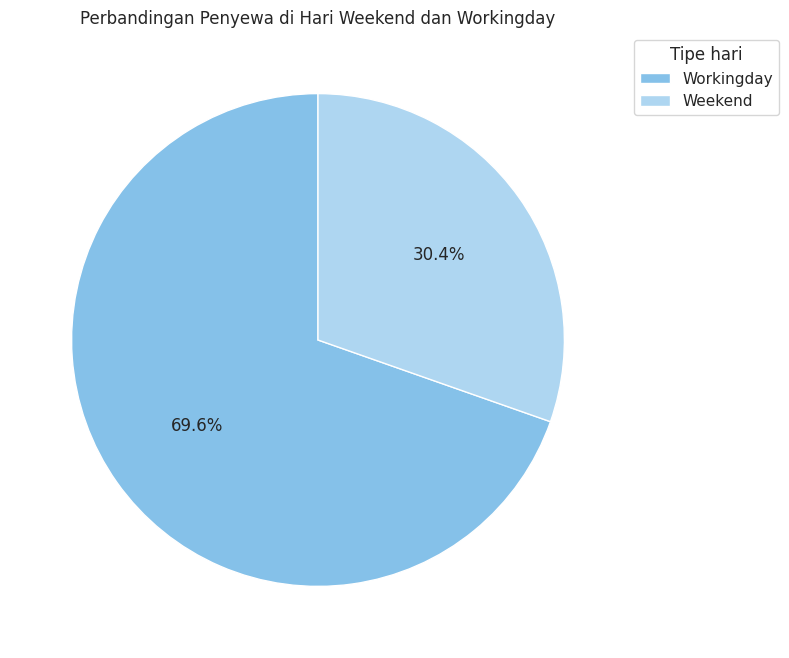

In [46]:
# Misalnya, kolom 'Label', 'Data A', dan 'Data B' ada di file CSV
workingday = day_df['workingday'].tolist()
weekday = day_df['weekday'].tolist()

# Warna untuk pie chart
colors = ['#85C1E9', '#AED6F1']

# Menghitung jumlah penyewa untuk workingday dan weekend
# Mengasumsikan 'workingday' bernilai 1 untuk hari kerja dan 0 untuk akhir pekan
workingday_cnt = day_df[day_df['workingday'] == 1]['cnt'].sum()
weekend_cnt = day_df[day_df['workingday'] == 0]['cnt'].sum()

# Data untuk pie chart
sizes = [workingday_cnt, weekend_cnt]

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Perbandingan Penyewa di Hari Weekend dan Workingday')

# Menambahkan legenda di samping pie chart
plt.legend(title='Tipe hari', labels=['Workingday', 'Weekend'], loc='upper left', bbox_to_anchor=(1, 1.0))

# Menampilkan grafik
plt.show()

**Insight**

- Ditribusi Penyewa : Sebagian besar penyewa melakukan aktivitas di hari kerja (workig day), dengan presentase sebesar 69,6%. Sementara itu, aktivitas peyewaan pada akhir pekan (weekend) hanya sebesar 30,4%.
- Konsisten Aktivtas : Tingginya presentase pada hari kerja menunjukkan bahwa layanan ditawarkan lebih banyak digunakan untuk kebutuhan rutin atau aktivitas harian dibandingkan rekreasi atau kegiatan santai yang biasaya dominan di akhir pekan.
- Target Strategis : Strategis pemasaran dan operasional dapat lebih di fokuskan pada hari kerja, mengingat demand yang lebih tinggi pada periode tersebut.

### Pertanyaan 3

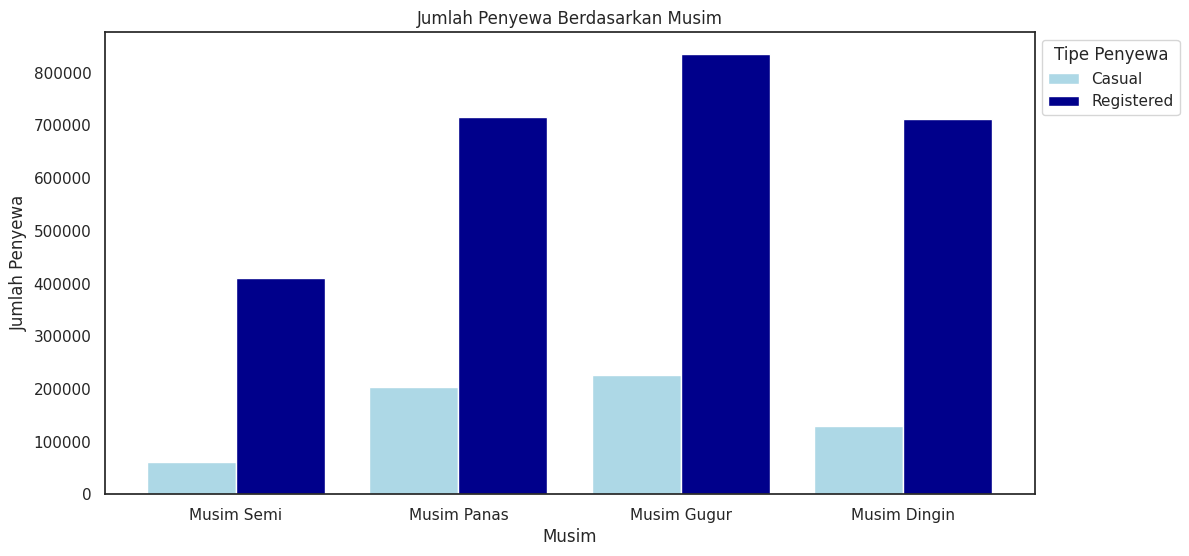

In [45]:
# Mengelompokkan data dan menghitung jumlah penyewa casual dan registered berdasarkan musim
grouped_df = day_df.groupby('season')[['casual', 'registered']].sum().reset_index()

# Mengatur gaya untuk visualisasi tanpa grid
sns.set(style='white')  # Mengatur gaya sederhana tanpa grid

# Membuat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(grouped_df['season'] - 0.2, grouped_df['casual'], width=0.4, label='Casual', color='#ADD8E6')
plt.bar(grouped_df['season'] + 0.2, grouped_df['registered'], width=0.4, label='Registered', color='#00008B')

# Menambahkan judul, label sumbu, dan keterangan musim
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.title('Jumlah Penyewa Berdasarkan Musim')
plt.xticks(grouped_df['season'], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])

# Menghilangkan grid
plt.grid(False)

# Menambahkan legenda dengan judul "Tipe Penyewa"
plt.legend(title='Tipe Penyewa',  loc='upper left',bbox_to_anchor=(1, 1.0))

# Menampilkan plot
plt.show()

**Insight**


- Penyewaan Tertinggi: Jumlah penyewa tertinggi pada musim gugur, baik untuk kategori registered mencapai 835038 dan casual 226091
- Dominasi Pengguna Registered: Pada semua musim, jumlah penyewa kategori registered yaitu 2672662  lebih tinggi dibandingkan kategori casual yaitu 620017. Ini menunjukkan mayoritas pengguna adalah pelanggan tetap atau anggota tedaftar
- Musim Panas dan Gugur yang Populer: Selain musim gugur, musim panas juga menunjukkan angka 715067 penyewaan yang cukup tinggi, khususnya untuk kategori registered. Ini mungkin terkait dengan cuaca yang mendukung aktivtas luar ruangan.
- Penyewaan Rendah pada Musim Semi: Jumlah penyewa terendah terjadi pada musim dingin registered 410726 dan casual 60622, kemungkinan karena faktor cuaca yang kurang mendukung untuk aktivitas di luar.
- Kesempatan untuk Menarik Penyewa Casual: Pada semua musim, jumlah penyewa casual lebih rendah dibandingkan registered. Ini bisa menjadi peluang untuk meningkatkan penyewaan dari kategori ini dengan promosi atau program yang menarik.


## Conclusion

**Conclution pertanyaan 1**
- Tren Kenaikan Awal: Jumlah penyewa meningkat secara signifikan dari Januari 2011 yaitu 38189 penyewa hingga mencapai puncak pertama pada Juni 2011 mencapai 143512 penyewa.
- Penurunan di Tengah Tahun: Setelah puncak awal, terjadi penurunan jumlah penyewa hingga mencapai 87323 merupakan titik terendah pada Desember 2011.
- Kenaikan Tajam Kedua: Awal tahun 2012 mencapai 96744 menunjukkan kenaikan yang signifikan dibandingkan awal tahun 2011 hingga pertengahan bulan tahun 2012 mencapai 218573 merupakan puncak kedua pada pertengahan tahun.
- Fluktuasi Tahunan: Jumlah penyewa per bulan mengalami pola fluktuasi yang konsisten setiap tahun, dengan puncak pada pertengahan tahun dan penurunan di akhir tahun.
- Periode Rendah: Penurunan tajam pada akhir 2011 dan 2012 mungkin dipengaruhi oleh faktor eksternal seperti cuaca atau perayaan tertentu.

**Conclution pertanyaan 2**
- Distribusi Penyewa: Sebagian besar aktivitas penyewaan terjadi pada hari kerja (69.6%), sedangkan akhir pekan hanya menyumbang 30.4%.
- Konsistensi Aktivitas: Tingginya aktivitas pada hari kerja menunjukkan bahwa layanan penyewaan lebih sering digunakan untuk kebutuhan rutin atau aktivitas harian, bukan sekadar rekreasi.

**Conclution pertanyaan 3**
- Penyewaan Tertinggi: Jumlah penyewa tertinggi tercatat pada musim gugur untuk kedua kategori, registered 835038 dan casual 226091.
- Dominasi Pengguna Registered: Penyewa dari kategori registered secara konsisten lebih tinggi mencapai  2672662 dibanding total keseluruhan casual 620017 di semua musim, menunjukkan mayoritas pengguna adalah pelanggan tetap.
- Musim Panas dan Gugur yang Populer: Selain musim gugur, musim panas juga menjadi waktu populer untuk penyewaan, terutama bagi pengguna kategori registered mencapai 715067 dan casual mencapai 203522 , kemungkinan karena cuaca yang mendukung.
- Penyewaan Rendah di Musim Semi: Musim semi memiliki jumlah penyewaan terendah registered mencapai 410726	dan casual mencapai 60622 , yang mungkin disebabkan oleh cuaca yang kurang mendukung aktivitas luar ruangan.

**Rekomendasi**
- Peningkatan Promosi pada Musim Dingin dan Akhir Tahun: Untuk mengatasi penurunan penyewaan, tawarkan program seperti diskon, promosi liburan, atau kampanye khusus musim dingin.
- Fokus pada Hari Kerja: Perkuat layanan dan penawaran pada hari kerja untuk memenuhi permintaan pelanggan tetap, seperti paket langganan bulanan atau harian.
- Target Strategis: Strategi pemasaran dapat lebih difokuskan pada hari kerja, seperti menawarkan paket langganan untuk pelanggan tetap atau promosi yang mendukung aktivitas kerja.
- Strategi untuk Penyewa Casual: Tingkatkan ketertarikan pelanggan casual dengan menghadirkan acara komunitas, bundling promosi, atau diskon pada akhir pekan.
- Diversifikasi Layanan Musiman: Sesuaikan strategi pemasaran dengan musim yang memiliki potensi penyewaan tinggi, seperti musim panas dan gugur, untuk memaksimalkan pendapatan.
- Pengembangan Infrastruktur: Pastikan jalur sepeda dan fasilitas pendukung lebih optimal pada musim dengan permintaan tinggi untuk meningkatkan kepuasan pelanggan.
- Peluang Peningkatan Penyewa Casual: Dengan jumlah penyewa casual yang lebih rendah, terdapat peluang untuk meningkatkan angka penyewaan dengan promosi musiman, diskon, atau aktivitas yang lebih menarik bagi pelanggan baru atau rekreasi.

In [41]:
!pip freeze requirements.text

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.9.0.36.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1

In [ ]:
day_df.to_csv('data_1.csv', index=False)

In [ ]:
hour_df.to_csv('data_2.csv', index=False)